In [87]:
from bagpy import bagreader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import emg_utils as eu

import importlib
importlib.reload(eu)

%matplotlib widget

## Load Data

bagpy is used to load bag files. 
A list of bagreaders is made. One bagreader for each trial. So if an experiment was performed 4 times, a list of 4 bagreaders will be made.

In [98]:
# directory = '/home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading' # uni
# directory = '/home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading' # home
directory = '/home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/' # home

anonymize = {1: '06_14_nat_unloading', 2: '06_15_chris_unloading', 3: '06_15_joh_unloading'}
target = 1

directory = directory + anonymize[target]

In [10]:
# b = []
# for filename in os.listdir(directory):
#     f = os.path.join(directory, filename)
#     if not os.path.isdir(f):
#         b.append(bagreader(f))

calibration = []
trial = []
baseline = []
mvc = []

for filename in os.listdir(directory):
    file = os.path.splitext(filename)[0]
    f = os.path.join(directory, filename)
    if not os.path.isdir(f):
        if file == 'calibration':
            calibration.append(bagreader(f))
        elif file.find('trial') != -1:
            trial.append(bagreader(f))
        elif file.find('baseline') != -1:
            baseline.append(bagreader(f))
        elif file.find('mvc') != -1:
            mvc.append(bagreader(f))

[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline2 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial2 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline1 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/mvc already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/calibration already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial3 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline3 already exists. Not creat

### Create csv files of given topics
Topics of all bagfiles saved in a list in corresponding order

In [11]:
trial_emg_list = []
trial_rms_list = []
trial_type_list = []
trial_state_list = []
trial_mass_list = []
baseline_emg_list = []
baseline_rms_list = []
baseline_type_list = []


for bag in trial:
    if len(os.listdir(bag.datafolder)) == 0:
        trial_emg_list.append(bag.message_by_topic('emg_raw'))
        trial_rms_list.append(bag.message_by_topic('emg_rms'))
        trial_type_list.append(bag.message_by_topic('load_type'))
        trial_state_list.append(bag.message_by_topic('state'))
        trial_mass_list.append(bag.message_by_topic('mass_change'))
    else:
        print("CSV files already exist for: ", bag.datafolder)
        for csv in os.listdir(bag.datafolder):
            file = os.path.splitext(csv)[0]
            target_path = os.path.join(bag.datafolder, csv)
            if 'emg_raw'.find(file) != -1:
                trial_emg_list.append(target_path)
            elif 'emg_rms'.find(file) != -1:
                trial_rms_list.append(target_path)
            elif 'load_type'.find(file) != -1:
                trial_type_list.append(target_path)
            elif 'state'.find(file) != -1:
                trial_state_list.append(target_path)
            elif 'mass_change'.find(file) != -1:
                trial_mass_list.append(target_path)

for bag in baseline:
    folder = os.listdir(bag.datafolder)
    if len(folder) == 0:
        baseline_emg_list.append(bag.message_by_topic('emg_raw'))
        baseline_rms_list.append(bag.message_by_topic('emg_rms'))
        baseline_type_list.append(bag.message_by_topic('load_type'))
    else:
        print("CSV files already exist for: ", bag.datafolder)
        for csv in folder:
            file = os.path.splitext(csv)[0]
            target_path = os.path.join(bag.datafolder, csv)
            if 'emg_raw'.find(file) != -1:
                baseline_emg_list.append(target_path)
            elif 'emg_rms'.find(file) != -1:
                baseline_rms_list.append(target_path)
            elif 'load_type'.find(file) != -1:
                baseline_type_list.append(target_path)


CSV files already exist for:  /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial2
CSV files already exist for:  /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial3
CSV files already exist for:  /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial1
CSV files already exist for:  /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline2
CSV files already exist for:  /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline1
CSV files already exist for:  /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline3


### Create pandas data frames from csv files

Function to convert csv to data frame:

In [12]:
def csv2df(csv_list):
    df_list = []
    for csv in csv_list:
            df_list.append(pd.read_csv(csv))
    return df_list

In [13]:
trial_emg_dflist = csv2df(trial_emg_list)
trial_rms_dflist = csv2df(trial_rms_list)
trial_type_dflist = csv2df(trial_type_list)
trial_state_dflist = csv2df(trial_state_list)
trial_mass_dflist = csv2df(trial_mass_list)

baseline_emg_dflist = csv2df(baseline_emg_list)
baseline_rms_dflist = csv2df(baseline_rms_list)
baseline_type_dflist = csv2df(baseline_type_list)

## Plot EMG data

In [14]:
plt.style.use('seaborn')

In [15]:
# MVC
mvc_csv = mvc[0].message_by_topic('/rms_samples')
mvc_max = pd.read_csv(mvc_csv)['data'].max()
print("MVC: " + str(mvc_max))

MVC: 0.0837975294663056


In [76]:
window_length = 40 # 25

### Per Trial Plot

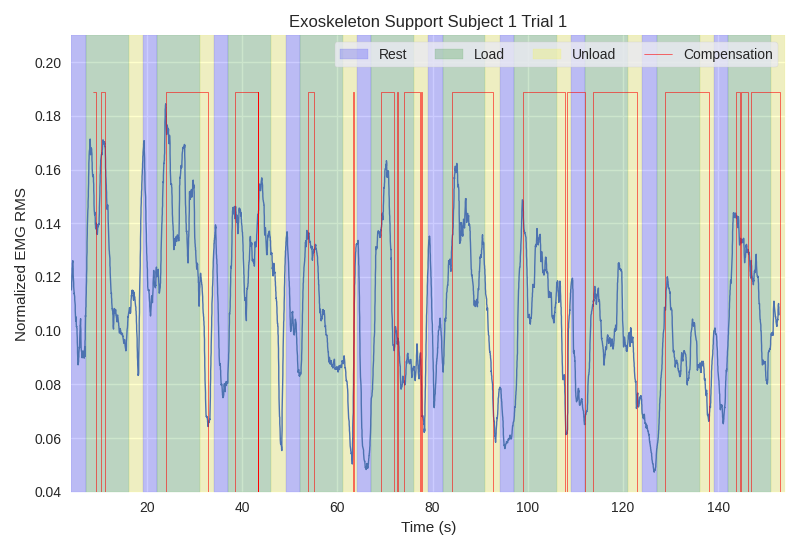

In [103]:
# plt.close('all')
i = 0
figure, axis = plt.subplots()
eu.single_EMG(axis, trial_type_dflist[i], trial_emg_dflist[i], window_length, True, trial_mass_dflist[i], 0.04, 0.21, mvc_max)
axis.set_title('Exoskeleton Support Subject ' + str(target) + ' Trial ' + str(i+1))
plt.tight_layout()

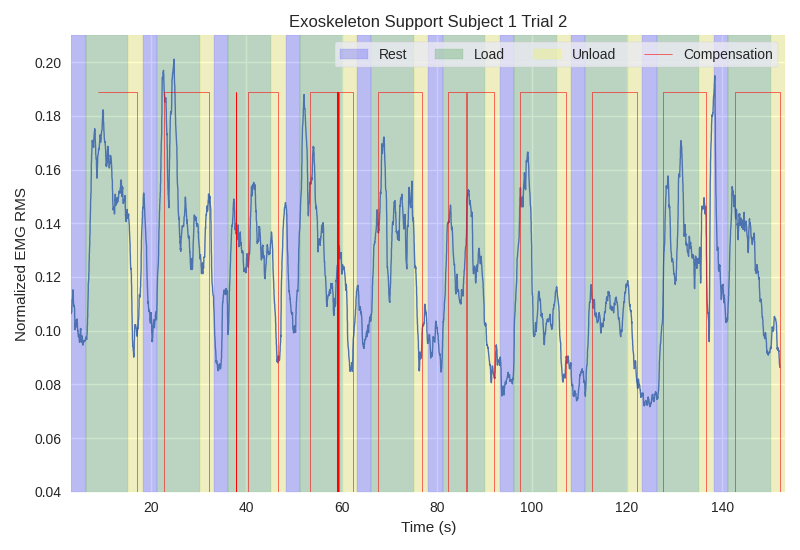

In [104]:
i = 1
figure, axis = plt.subplots()
eu.single_EMG(axis, trial_type_dflist[i], trial_emg_dflist[i], window_length, True, trial_mass_dflist[i], 0.04, 0.21, mvc_max)
axis.set_title('Exoskeleton Support Subject ' + str(target) + ' Trial ' + str(i+1))
plt.tight_layout()

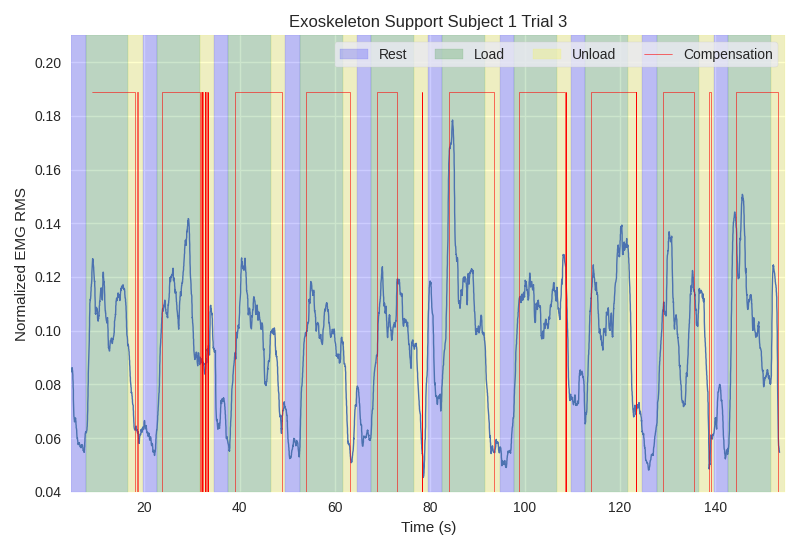

In [105]:
i = 2
figure, axis = plt.subplots()
eu.single_EMG(axis, trial_type_dflist[i], trial_emg_dflist[i], window_length, True, trial_mass_dflist[i], 0.04, 0.21, mvc_max)
axis.set_title('Exoskeleton Support Subject ' + str(target) + ' Trial ' + str(i+1))
plt.tight_layout()

### Per Baseline Plot

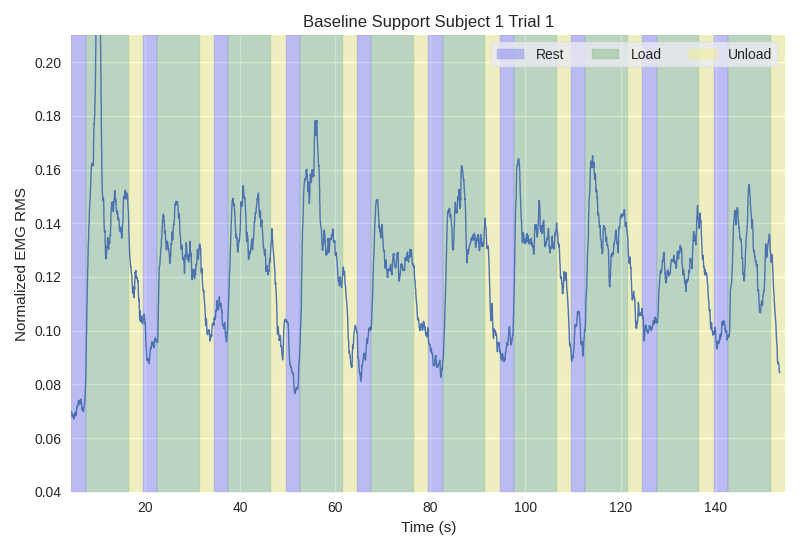

In [106]:
# plt.close('all')
i = 0
figure, axis = plt.subplots()
eu.single_EMG(axis, baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], 0.04, 0.21, mvc_max)
axis.set_title('Baseline Support Subject ' + str(target) + ' Trial ' + str(i+1))
plt.tight_layout()

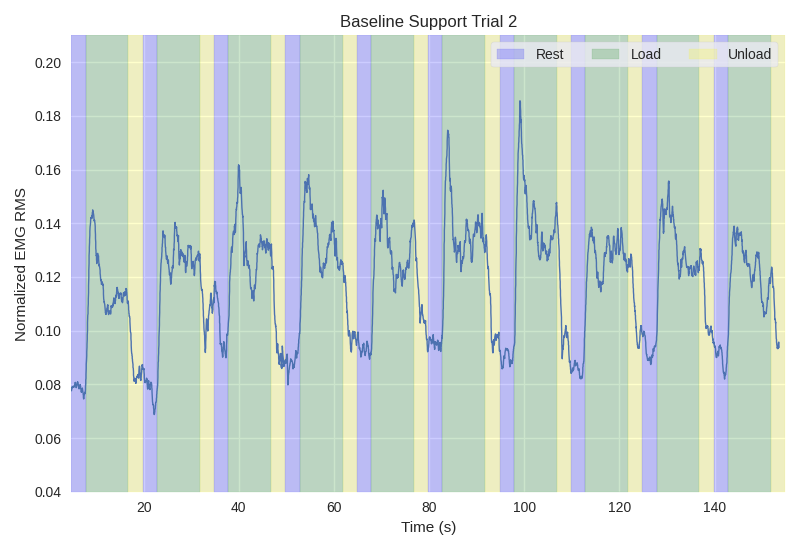

In [94]:
i = 1
figure, axis = plt.subplots()
eu.single_EMG(axis, baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], 0.04, 0.21,mvc_max)
axis.set_title('Baseline Support Subject ' + str(target) + ' Trial ' + str(i+1))
plt.tight_layout()

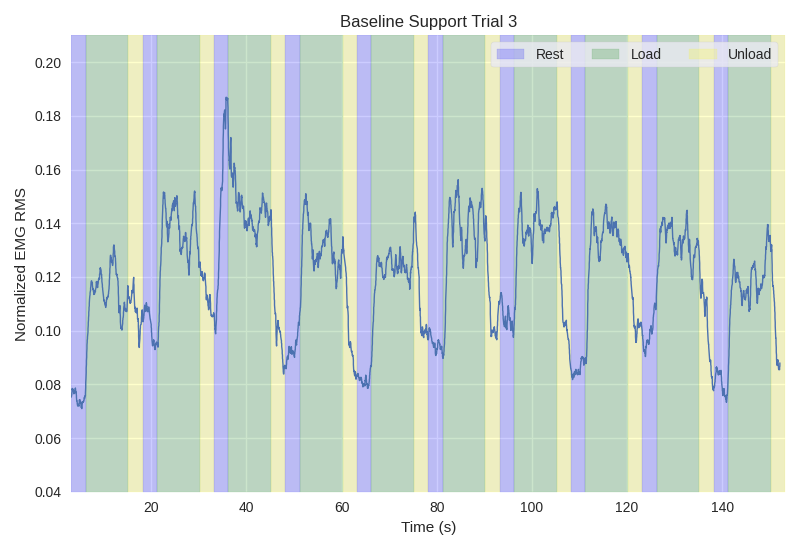

In [95]:
i = 2
figure, axis = plt.subplots()
eu.single_EMG(axis, baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], 0.04, 0.21, mvc_max)
axis.set_title('Baseline Support Subject ' + str(target) + ' Trial ' + str(i+1))
plt.tight_layout()

### Exoskeleton, Baseline EMG side by side

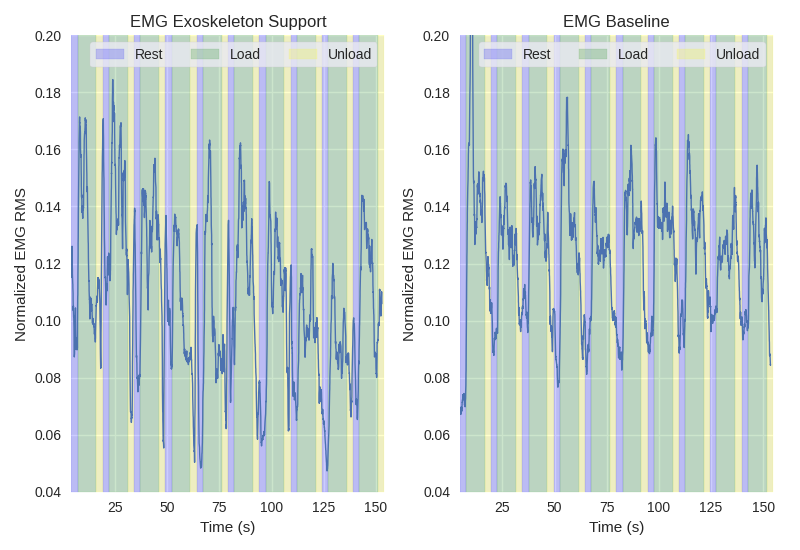

In [83]:
# plt.close('all')
i = 0
figure, axis = eu.EMG_comp(trial_type_dflist[i], trial_emg_dflist[i], baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], 'horizontal', 0.04, 0.20, mvc_max)
plt.tight_layout()

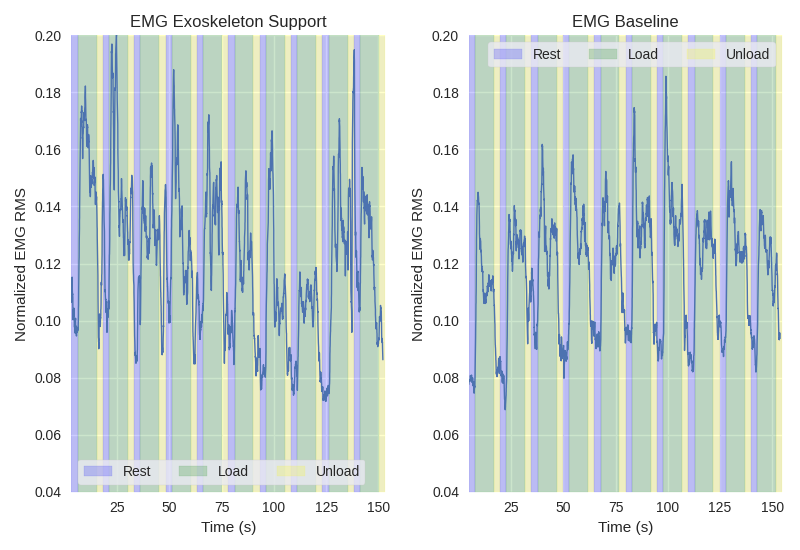

In [84]:
i = 1
figure, axis = eu.EMG_comp(trial_type_dflist[i], trial_emg_dflist[i], baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], 'horizontal', 0.04, 0.20, mvc_max)
plt.tight_layout()

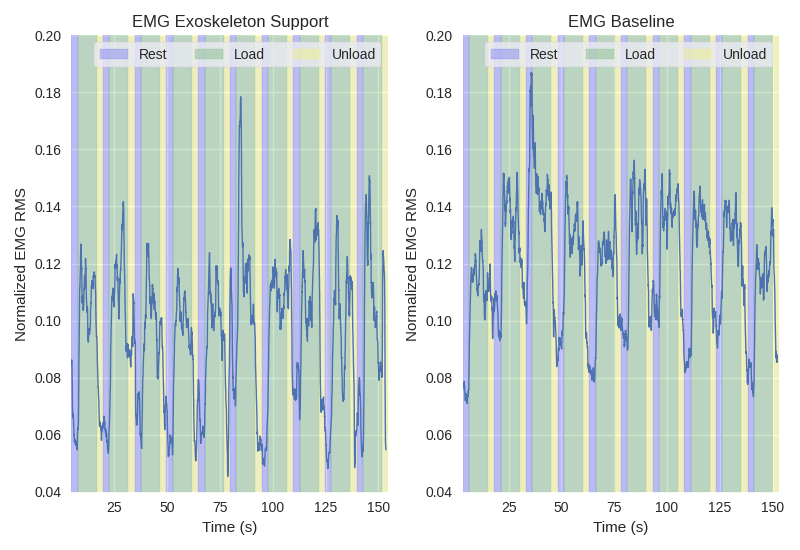

In [85]:
i = 2
figure, axis = eu.EMG_comp(trial_type_dflist[i], trial_emg_dflist[i], baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], 'horizontal', 0.04, 0.20, mvc_max)
plt.tight_layout()

## Overview Plot

### 1 Trial

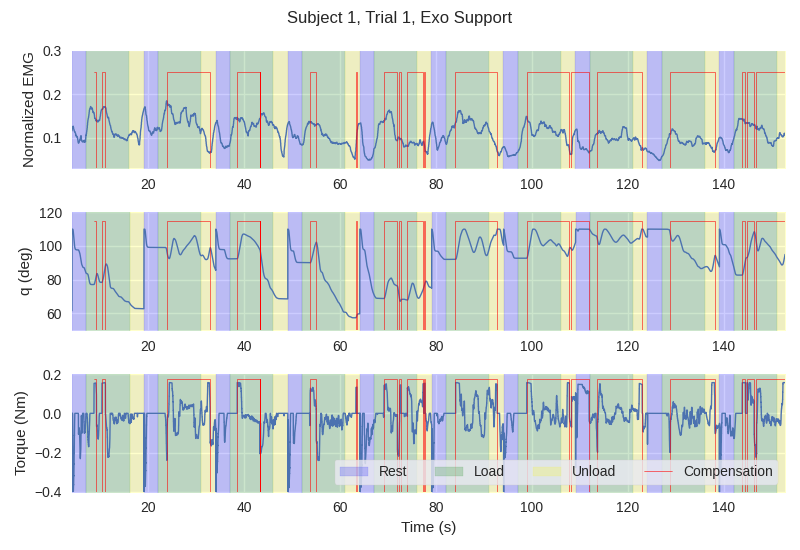

In [107]:
i = 0
figure, axes = eu.plot_overview(trial_type=trial_type_dflist[i], emg=trial_emg_dflist[i], state=trial_state_dflist[i], mass=trial_mass_dflist[i], window=window_length, mvc=mvc_max)
figure.suptitle('Subject ' + str(target) + ', Trial ' + str(i+1) + ', Exo Support')
plt.tight_layout()

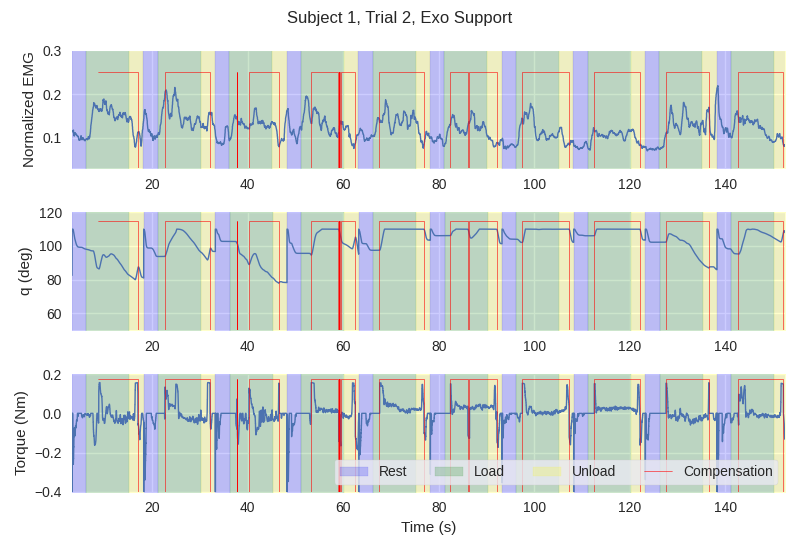

In [51]:
i = 1
figure, axes = eu.plot_overview(trial_type=trial_type_dflist[i], emg=trial_emg_dflist[i], state=trial_state_dflist[i], mass=trial_mass_dflist[i], window=window_length, mvc=mvc_max)
figure.suptitle('Subject ' + str(target) + ', Trial ' + str(i+1) + ', Exo Support')
plt.tight_layout()

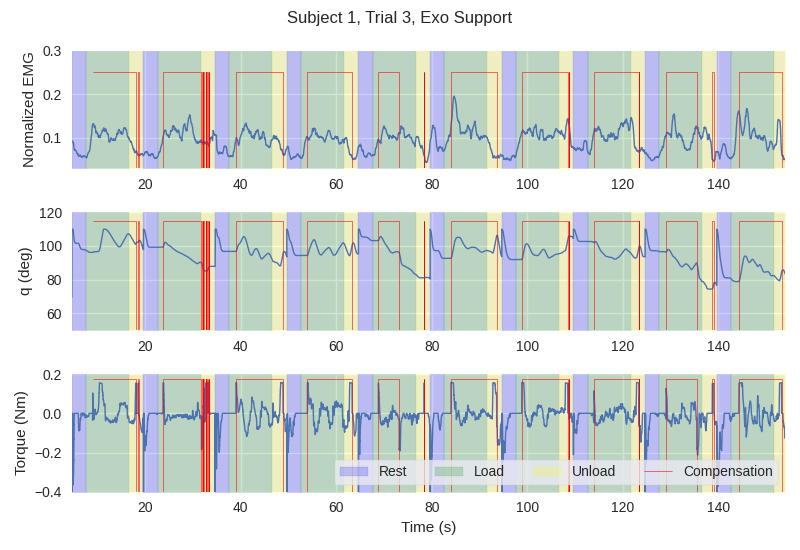

In [52]:
i = 2
figure, axes = eu.plot_overview(trial_type=trial_type_dflist[i], emg=trial_emg_dflist[i], state=trial_state_dflist[i], mass=trial_mass_dflist[i], window=window_length, mvc=mvc_max)
figure.suptitle('Subject ' + str(target) + ', Trial ' + str(i+1) + ', Exo Support')
plt.tight_layout()

## Average Plots

Text(0.5, 1.0, 'Subject 1:Exoskeleton EMG average over all trials')

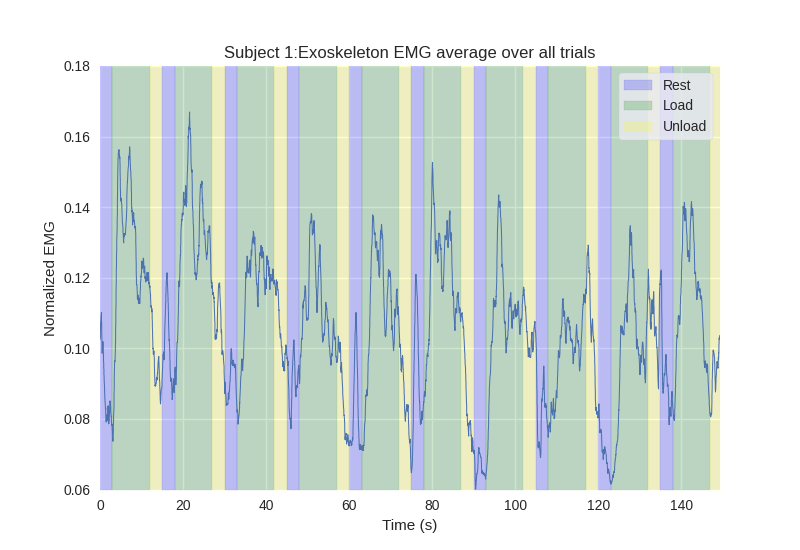

In [108]:
plt.close('all')
figure, axis = plt.subplots()
eu.plot_average(axis, trial_emg_dflist, trial_type_dflist, window_length, 0.06, 0.18, mvc_max)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject '+str(target)+':Exoskeleton EMG average over all trials')

Text(0.5, 1.0, 'Subject 1:Baseline EMG average over all trials')

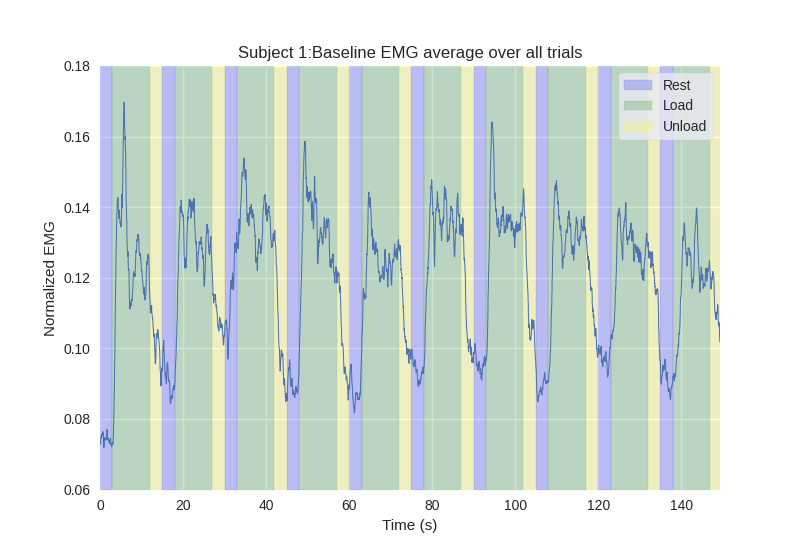

In [109]:
plt.close('all')
figure, axis = plt.subplots()
eu.plot_average(axis, baseline_emg_dflist, baseline_type_dflist, window_length, 0.06, 0.18, mvc_max)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject '+str(target)+':Baseline EMG average over all trials')

Text(0.5, 0.98, 'Subject 1: EMG Average Comparison')

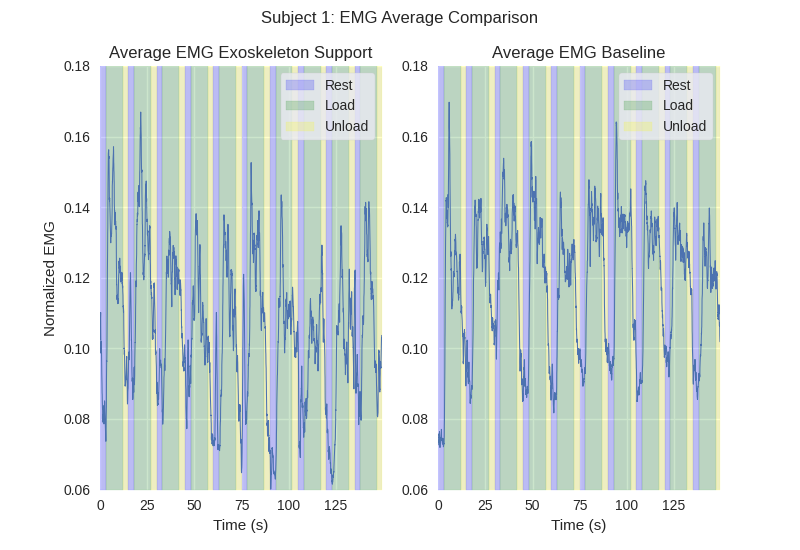

In [111]:
plt.close('all')
figure, axis = eu.average_EMG_comp(trial_type_dflist, trial_emg_dflist, baseline_type_dflist, baseline_emg_dflist, window_length, 'horizontal', 0.06, 0.18, mvc_max)
axis[0].set_ylabel('Normalized EMG')
axis[0].set_xlabel('Time (s)')
axis[1].set_xlabel('Time (s)')
figure.suptitle('Subject ' + str(target) + ': EMG Average Comparison')

# Calculate Averages

### Data Cleaning?

### Average Summary

In [21]:
trial_rest_avg, trial_load_avg, trial_unload_avg, trial_rest_var, trial_load_var, trial_unload_var = eu.calculate_average_all(trial_type_dflist, trial_emg_dflist, mvc_max)
baseline_rest_avg, baseline_load_avg, baseline_unload_avg, baseline_rest_var, baseline_load_var, baseline_unload_var = eu.calculate_average_all(baseline_type_dflist, baseline_emg_dflist, mvc_max)

trial_ratio_list = eu.load_rest_ratio(trial_load_avg, trial_rest_avg)
baseline_ratio_list = eu.load_rest_ratio(baseline_load_avg, baseline_rest_avg)

In [116]:
for i in range(len(trial_rest_avg)):
    print("Trial " + str(i+1) + " rest: " + "{:.6f}".format(trial_rest_avg[i]) + ", load: " + "{:.6f}".format(trial_load_avg[i]))

for i in range(len(baseline_rest_avg)):
    print("Baseline " + str(i+1) + " rest: " + "{:.6f}".format(baseline_rest_avg[i]) + ", load: " + "{:.6f}".format(baseline_load_avg[i]))

# "{:.2f}".format(self.objects.get(box.Class))

Trial 1 rest: 0.106655, load: 0.107495
Trial 2 rest: 0.121397, load: 0.122155
Trial 3 rest: 0.087961, load: 0.089359
Baseline 1 rest: 0.116410, load: 0.117965
Baseline 2 rest: 0.109801, load: 0.111487
Baseline 3 rest: 0.115089, load: 0.116351


### Load EMG to Rest EMG Ratio

In [118]:
for i in range(len(trial_ratio_list)):
    print("Trial " + str(i+1) + " load to rest ratio: " + "{:.6f}".format(trial_ratio_list[i]))

for i in range(len(baseline_ratio_list)):
    print("Trial " + str(i+1) + " load to rest ratio: " + "{:.6f}".format(baseline_ratio_list[i]))

Trial 1 load to rest ratio: 1.007877
Trial 2 load to rest ratio: 1.006245
Trial 3 load to rest ratio: 1.015888
Trial 1 load to rest ratio: 1.013357
Trial 2 load to rest ratio: 1.015351
Trial 3 load to rest ratio: 1.010965
